### Needed library

In [2]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim

### read data: votingward.csv dataset

In [3]:
data = pd.read_csv("votingward.csv")

### show data

In [4]:
data

,ID,Ward,Aldermanic District,Address,Name,Main Voter Entrance,Accessibility Voter Entrance,Main Voter Parking,Accessibility Voter Parking,Alderman
0,1,1,9,8463 N Granville Rd,Firehouse - Engine 38,Voters should use the main building entrance o...,The accessible entrance is the main building e...,Street parking is available on W Donna Drive,Designated accessible street parking is availa...,Chantia Lewis
1,2,2,9,9050 N Swan Rd,Cudahy YMCA,Voters should use the main building entrance o...,The accessible entrance is the main building ...,Parking is avaiable in the building's parking lot,Designated accessible parking spaces are avail...,Chantia Lewis
2,3,3,9,9050 N Swan Rd,Cudahy YMCA,Voters should use the main building entrance o...,The accessible entrance is the main building ...,Parking is avaiable in the building's parking lot,Designated accessible parking spaces are avail...,Chantia Lewis
3,4,4,9,9445 N 76th St,Spirit Life Church,Voters should use the main building entrance o...,The accessible entrance is the main building e...,Parking is avaiable in the building's parking lot,Designated accessible parking spaces are avail...,Chantia Lewis
4,5,5,9,9050 N Swan Rd,Cudahy YMCA,Voters should use the main building entrance o...,The accessible entrance is the main building ...,Parking is avaiable in the building's parking lot,Designated accessible parking spaces are avail...,Chantia Lewis
5,6,6,9,8251 N Celina St,Goodrich School,Voters should use the main building entrance o...,The accessible entrance is the main building e...,Street parking is available near the N Celina ...,Designated accessible street parking is availa...,Chantia Lewis
6,7,7,9,8251 N Celina St,Goodrich School,Voters should use the main building entrance o...,The accessible entrance is the main building e...,Street parking is available near the N Celina ...,Designated accessible street parking is availa...,Chantia Lewis
7,8,8,5,7501 N Granville Rd,Vincent High School,Voters should use the entrance just north of t...,The accessible entrance is the entrance just n...,Parking is avaiable in the building's parking lot,Designated accessible parking spaces are avail...,"James A. Bohl, Jr."
8,9,9,9,7001 N 86th St,Stuart School,Voters should use the main building entrance o...,The accessible entrance is the main building e...,Street parking is available near the N 86th St...,Designated accessible street parking is availa...,Chantia Lewis
9,10,10,9,7001 N 86th St,Stuart School,Voters should use the main building entrance o...,The accessible entrance is the main building e...,Street parking is available near the N 86th St...,Designated accessible street parking is availa...,Chantia Lewis


### extract address col from data

In [5]:
loc = data['Address'].values

In [6]:
loc

array(['8463 N Granville Rd', '9050 N Swan Rd', '9050 N Swan Rd',
       '9445 N 76th St', '9050 N Swan Rd', '8251 N Celina St',
       '8251 N Celina St', '7501 N Granville Rd', '7001 N 86th St',
       '7001 N 86th St', '7900 W Acacia St', '6594 N Landers St',
       '5700 W Green Tree Rd', '7878 N 60th St', '7878 N 60th St',
       '6850 N 53rd St', '6850 N 53rd St', '6680 N Teutonia Av',
       '6680 N Teutonia Av', '5996 N 35th St', '6100 N 42nd St',
       '6100 N 42nd St', '5760 N 67th St', '5760 N 67th St',
       '5760 N 67th St', '5760 N 67th St', '8135 W Florist Av',
       '8135 W Florist Av', '8135 W Florist Av', '8718 W Thurston Av',
       '8718 W Thurston Av', '6644 N 107th St', '12021 W Florist Av',
       '10825 W Villard Av', '10825 W Villard Av', '5100 N 91st St',
       '8601 W Lancaster Av', '8601 W Lancaster Av', '4850 N 82nd St',
       '5575 N 76th St', '5354 N 68th St', '4931 N 68th St',
       '5354 N 68th St', '4931 N 68th St', '5460 N 64th St',
       '5000

### preprocess loc data in order to visual it: 1. clean  error data, 2. process format

In [13]:
cleaned_loc = []
dirty_loc = []
for i in range(len(loc)):
    if str(loc[i]).isdigit() == False:
        cleaned_loc.append(loc[i])
    else:
        dirty_loc.append(loc[i])
print("Length of cleaned data is: ", len(cleaned_loc))
print("Length of dirty data is: ", len(dirty_loc))

Length of cleaned data is:  326
Length of dirty data is:  0


In [14]:
counter = 0
cleaned_loc2 = []
for item in cleaned_loc:
    if isinstance(item, float) == False:
        cleaned_loc2.append(item)
    else:
        counter += 1
counter

0

In [15]:
cleaned_loc2

['8463 N Granville Rd',
 '9050 N Swan Rd',
 '9050 N Swan Rd',
 '9445 N 76th St',
 '9050 N Swan Rd',
 '8251 N Celina St',
 '8251 N Celina St',
 '7501 N Granville Rd',
 '7001 N 86th St',
 '7001 N 86th St',
 '7900 W Acacia St',
 '6594 N Landers St',
 '5700 W Green Tree Rd',
 '7878 N 60th St',
 '7878 N 60th St',
 '6850 N 53rd St',
 '6850 N 53rd St',
 '6680 N Teutonia Av',
 '6680 N Teutonia Av',
 '5996 N 35th St',
 '6100 N 42nd St',
 '6100 N 42nd St',
 '5760 N 67th St',
 '5760 N 67th St',
 '5760 N 67th St',
 '5760 N 67th St',
 '8135 W Florist Av',
 '8135 W Florist Av',
 '8135 W Florist Av',
 '8718 W Thurston Av',
 '8718 W Thurston Av',
 '6644 N 107th St',
 '12021 W Florist Av',
 '10825 W Villard Av',
 '10825 W Villard Av',
 '5100 N 91st St',
 '8601 W Lancaster Av',
 '8601 W Lancaster Av',
 '4850 N 82nd St',
 '5575 N 76th St',
 '5354 N 68th St',
 '4931 N 68th St',
 '5354 N 68th St',
 '4931 N 68th St',
 '5460 N 64th St',
 '5000 N 53rd St',
 '5000 N 53rd St',
 '4500 W Custer Ave',
 '4500 W Cus

In [16]:
latitude_longitude = []
counter = 0
for j in range(len(cleaned_loc2[:3000])):
    try:
        st = cleaned_loc2[j].split('&')
        if len(st) == 1:
            location = geolocator.geocode(cleaned_loc2[j])
            latitude_longitude.append([location.latitude, location.longitude])
        else:
            location = geolocator.geocode(st[0], st[1])
            latitude_longitude.append([location.latitude, location.longitude])
    except:
        #counter += 1
        print(cleaned_loc2[j])

4950 N 24th St
7667 W Congress St
1011 W Center St
5003 W Lisbon Av
3334 W Highland Bl
2330 W Vieau St
2330 W Vieau St
1021 S 21st St
1515 W Lapham Bl
1515 W Lapham Bl
1515 W Lapham Bl
700 S 4th St
730 W Lapham Bl
730 W Lapham Bl
4040 W Forest Home Av
6500 W KK River Pkwy
6500 W KK River Pkwy
6500 W KK River Pkwy
3700 S 2nd St
2330 W Vieau St


In [18]:
latitude, longitude = [], []
for i in range(len(latitude_longitude)):
    latitude.append(latitude_longitude[i][0])
    longitude.append(latitude_longitude[i][1])

### analyze loc data

In [20]:
print("Minimum of Latitude", min(latitude))
print("Maximum of Latitude", max(latitude))
print("Minimum of Longitude", min(longitude))
print("Maximum of Latitude", max(longitude))

Minimum of Latitude -26.1651824
Maximum of Latitude 48.41479465
Minimum of Longitude -122.97113578946
Maximum of Latitude 26.1712931


### use map tools 

In [9]:
geolocator = Nominatim(user_agent = 'baidu')

### visual loc data in map

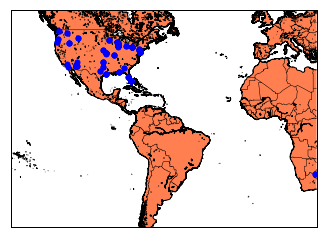

In [19]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='merc', lat_0 = 37, lon_0 = -77,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-150, llcrnrlat=-50,
    urcrnrlon=27, urcrnrlat=56)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
#lons = [-135.3318, -134.8331, -134.6572]
#lats = [57.0799, 57.0894, 56.2399]
x,y = map(longitude, latitude)
map.plot(x, y, 'bo', markersize=5)
 
plt.show()

### extract Alderman data from data

In [29]:
label = data['Alderman']

### analyze Alderman data

In [30]:
label_dict = {}

for l in label:
    if l in label_dict:
        label_dict[l] += 1
    else:
        label_dict[l] = 1

In [31]:
label_dict

{'Ashanti Hamilton': 22,
 'Cavalier Johnson': 22,
 'Chantia Lewis': 19,
 'James A. Bohl, Jr.': 22,
 'Jose G. Perez': 22,
 'Khalif J. Rainey': 22,
 'Mark A. Borkowski': 22,
 'Michael J. Murphy': 25,
 'Milele A. Coggs': 22,
 'Nik Kovac': 19,
 'Robert G. Donovan': 16,
 'Robert J. Bauman': 18,
 'Russell W. Stamper, II': 25,
 'Terry L. Witkowski': 24,
 'Tony Zielinski': 26}

In [26]:
import matplotlib.pyplot as plt

In [33]:
label_set = []
label_num = []
for label in label_dict:
    label_set.append(label)
    label_num.append(label_dict[label])

In [45]:
label_set

['Chantia Lewis',
 'James A. Bohl, Jr.',
 'Ashanti Hamilton',
 'Cavalier Johnson',
 'Khalif J. Rainey',
 'Michael J. Murphy',
 'Milele A. Coggs',
 'Nik Kovac',
 'Russell W. Stamper, II',
 'Robert J. Bauman',
 'Robert G. Donovan',
 'Jose G. Perez',
 'Tony Zielinski',
 'Mark A. Borkowski',
 'Terry L. Witkowski']

### show Alderman data distributions in pictures.

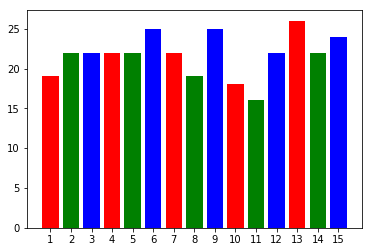

In [49]:
plt.bar(range(len(label_num)), label_num, color='rgb', tick_label=range(1, len(label_set)+1))
plt.show()

### extract Name data

In [51]:
names = data['Name']

In [52]:
names

0                         Firehouse - Engine 38
1                                   Cudahy YMCA
2                                   Cudahy YMCA
3                            Spirit Life Church
4                                   Cudahy YMCA
5                               Goodrich School
6                               Goodrich School
7                           Vincent High School
8                                 Stuart School
9                                 Stuart School
10     Milwaukee School of Sign Language School
11             Clovernook Playground Fieldhouse
12                          Clara Barton School
13                               Thoreau School
14                               Thoreau School
15                        Webster Middle School
16                        Webster Middle School
17              Milwaukee Police Safety Academy
18              Milwaukee Police Safety Academy
19                        Thurston Woods School
20                       Agape Community

### process name data

In [61]:
school = 0
apartment = 0
house = 0
center = 0
church = 0
other = 0
for name in names:
    if 'School' in name:
        school += 1
    elif 'Apartment' in name:
        apartment += 1
    elif 'house' in name or 'House' in name:
        house += 1
    elif 'center' in name or 'Center' in name:
        center += 1
    elif 'church' in name or 'Church' in name:
        church += 1
    else:
        other += 1

In [62]:
print('school, ', school)
print('apartment, ', apartment)
print('house: ', house)
print('center, ', center)
print('church, ', church)
print('other, ', other)

school,  162
apartment,  12
house:  22
center,  20
church,  17
other,  93


### show name data

D:\Users\zwl\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


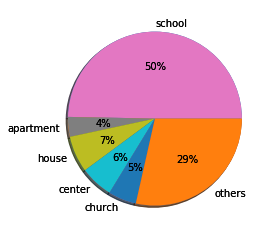

In [64]:
label = ['school', 'apartment', 'house', 'center', 'church', 'others']
num = [school, apartment, house, center, church, other]
plt.axes(aspect=1)
plt.pie(x=num, labels=label, autopct='%.0f%%', shadow=True)
plt.show()

### Extract Accessibility Voter Parking

In [65]:
parkings = data['Accessibility Voter Parking']

In [66]:
parkings

0      Designated accessible street parking is availa...
1      Designated accessible parking spaces are avail...
2      Designated accessible parking spaces are avail...
3      Designated accessible parking spaces are avail...
4      Designated accessible parking spaces are avail...
5      Designated accessible street parking is availa...
6      Designated accessible street parking is availa...
7      Designated accessible parking spaces are avail...
8      Designated accessible street parking is availa...
9      Designated accessible street parking is availa...
10     Designated accessible street parking is availa...
11     Designated accessible street parking is availa...
12     Designated accessible street parking is availa...
13     Designated accessible street parking is availa...
14     Designated accessible street parking is availa...
15     Designated accessible parking spaces are avail...
16     Designated accessible parking spaces are avail...
17     Designated accessible pa

In [67]:
st = 0
av = 0
build = 0
for park in parkings:
    if 'street' in park or 'St' in park:
        st += 1
    elif 'Av' in park:
        av += 1
    else:
        build += 1

In [68]:
print('st: ', st)
print('av,,,', av)
print('build,  ', build)

st:  210
av,,, 5
build,   111


### show parking distribution

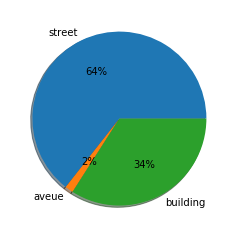

In [69]:
label = ['street', 'aveue', 'building']
num = [st, av, build]
plt.axes(aspect=1)
plt.pie(x=num, labels=label, autopct='%.0f%%', shadow=True)
plt.show()

### consistence between main voter entrance and accessibility voter entrance

In [70]:
main_voter = data['Main Voter Entrance']
access = data['Accessibility Voter Entrance']

In [73]:
num = 0
for i in range(len(main_voter)):
    if 'The accessible entrance is '+main_voter[i][18:]==access[i]:
        num += 1

In [74]:
num

182

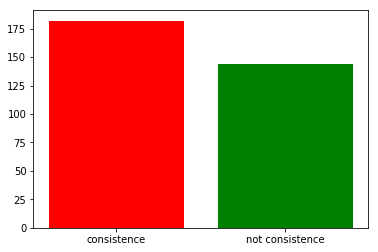

In [75]:
plt.bar(range(2), [182, len(access)-182], color='rgb', tick_label=['consistence', 'not consistence'])
plt.show()